In [1]:
from fusionsolar import Client, PandasClient
from _login import user, password
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x-2plcaqjs5ik62q6kde8b85mr7vtcvvdd6lin6m1jns7xk9s5s47xnxpgo67t6lqler3s7xo8g806ti7u48ipk4k685vvakqk1fft6l9e069fgbdcuq7uljjyhc5jbuqm


In [2]:
date = pd.Timestamp('20230526', tz='Europe/Brussels')

with PandasClient(user_name=user, system_code=password) as client:
    sl = client.get_dev_list(station_code="NE=36239547")
    station_code = sl['data'][1]['stationCode']

    df = client.get_kpi_day(station_code=station_code, date=date)

In [3]:
df

,radiation_intensity,installed_capacity,use_power,inverter_power,reduction_total_tree,power_profit,theory_power,reduction_total_coal,perpower_ratio,reduction_total_co2,ongrid_power,performance_ratio
collectTime,,,,,,,,,,,,
2023-05-10 23:00:00+00:00,NaN,4.05,NaN,0.00,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN
2023-05-11 23:00:00+00:00,NaN,4.05,12.38,0.56,NaN,NaN,NaN,0.001,0.138,0.001,0.06,NaN
2023-05-12 23:00:00+00:00,NaN,4.05,4.77,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-13 23:00:00+00:00,NaN,4.05,6.45,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-14 23:00:00+00:00,NaN,4.05,5.50,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-15 23:00:00+00:00,NaN,4.05,7.33,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-16 23:00:00+00:00,NaN,4.05,6.43,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-17 23:00:00+00:00,NaN,4.05,6.75,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN
2023-05-18 23:00:00+00:00,NaN,4.05,7.14,0.00,NaN,NaN,NaN,0.000,0.000,0.000,0.00,NaN


In [4]:
df.dtypes

radiation_intensity     float64
installed_capacity      float64
use_power               float64
inverter_power          float64
reduction_total_tree    float64
power_profit            float64
theory_power            float64
reduction_total_coal    float64
perpower_ratio          float64
reduction_total_co2     float64
ongrid_power            float64
performance_ratio       float64
dtype: object

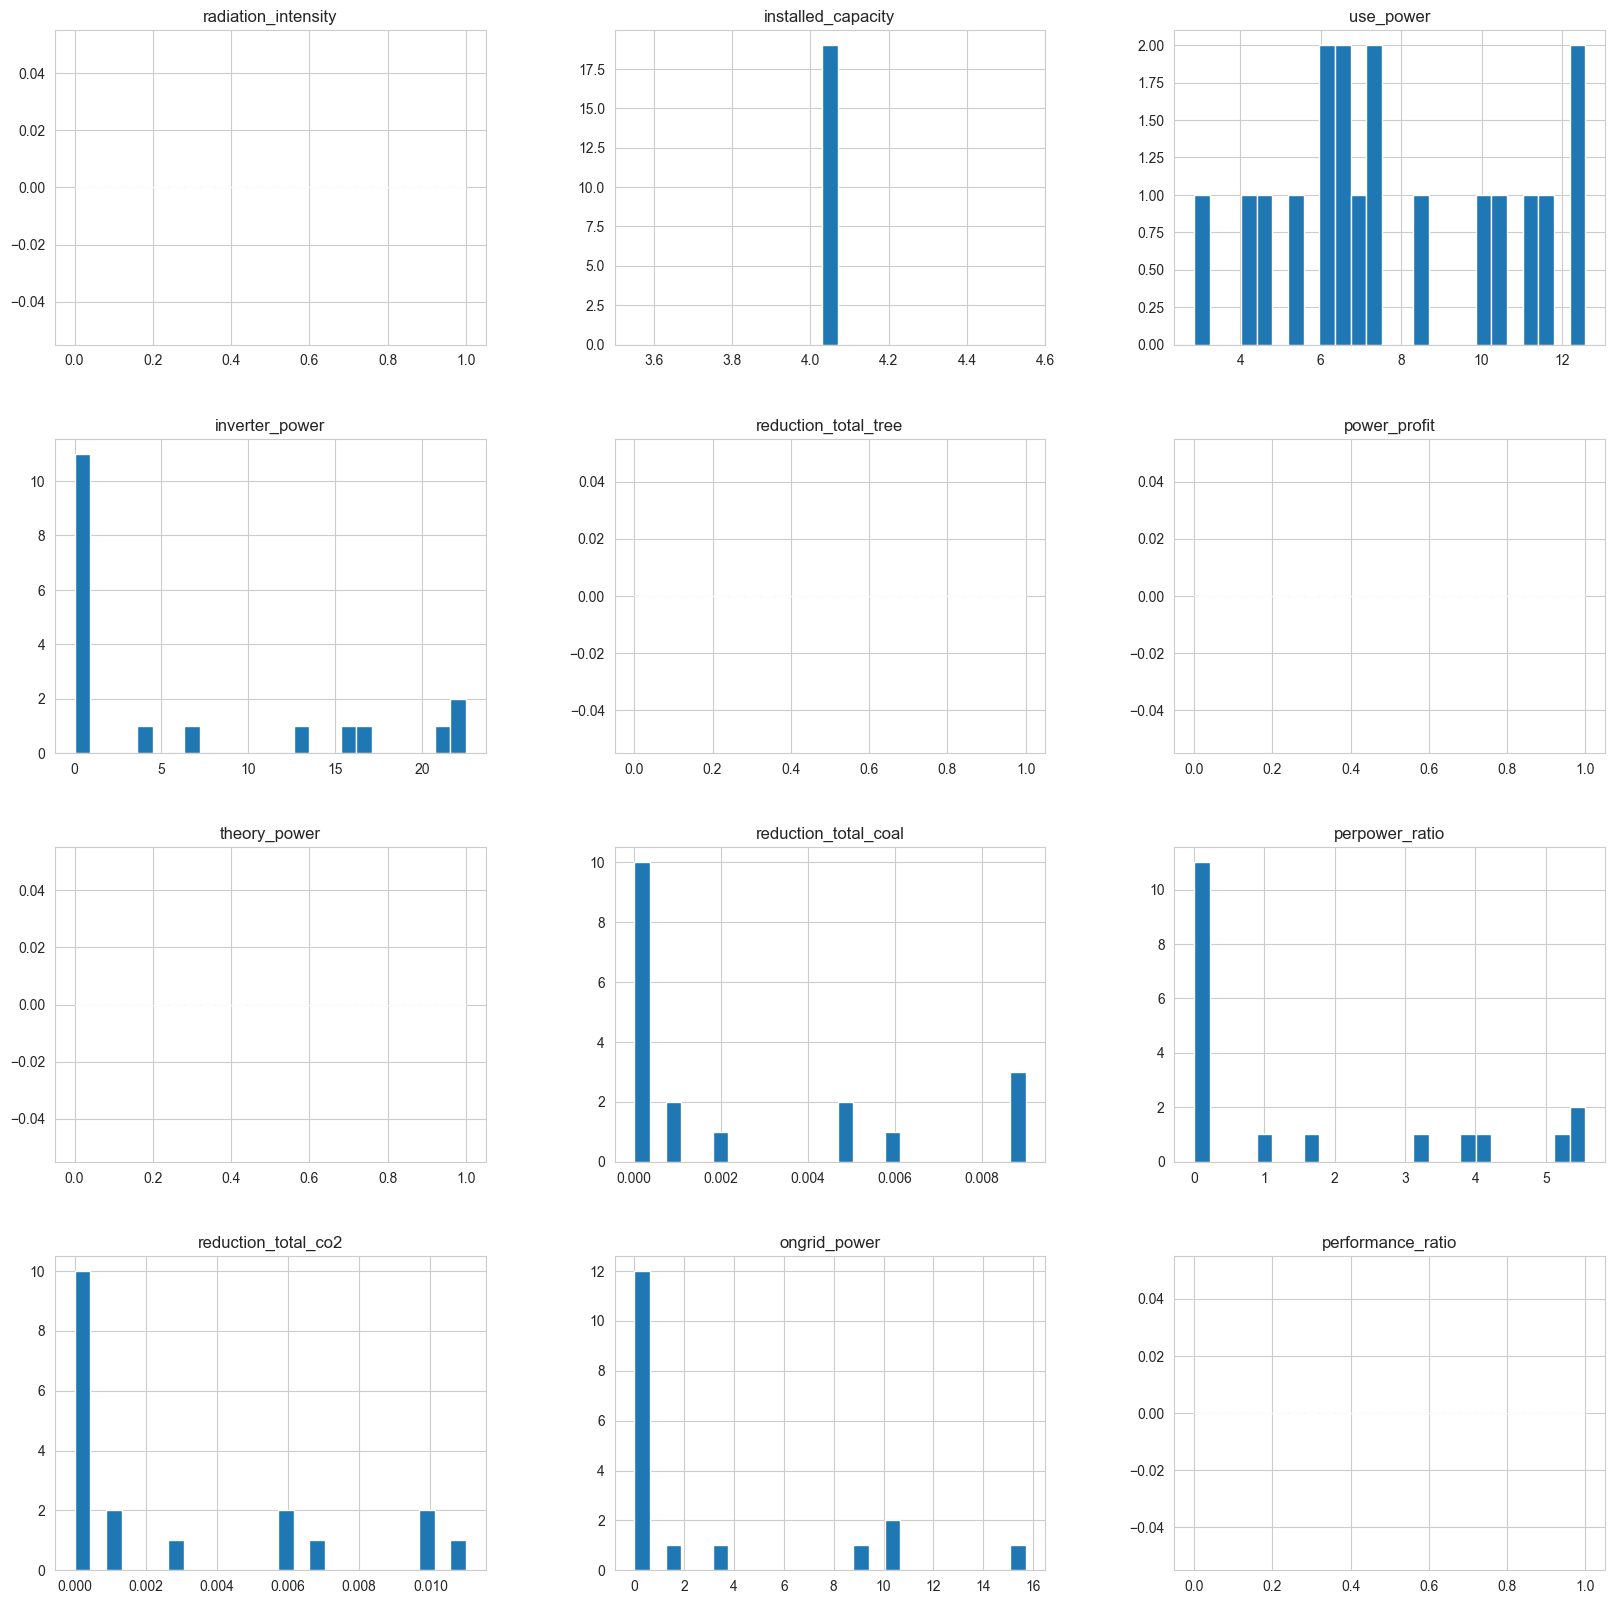

In [5]:
df.hist(bins=25,figsize=(20,20))
plt.show()

In [11]:
# Selecting an interesting period

start = "2023-05-10 08:45"
end = "2023-05-29 23:00"

# Making the selected series
# Verbruik
use_power = df.loc[start:end,'use_power']
use_power = pd.to_numeric(use_power, errors='coerce')

C:\Users\avanloon\AppData\Local\Temp\ipykernel_20052\2140292796.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  verbruik = sns.lineplot(data=use_power, palette="tab10", linewidth=1, markers=True, dashes=True)


Text(0, 0.5, 'Verbruikt [kWh]')

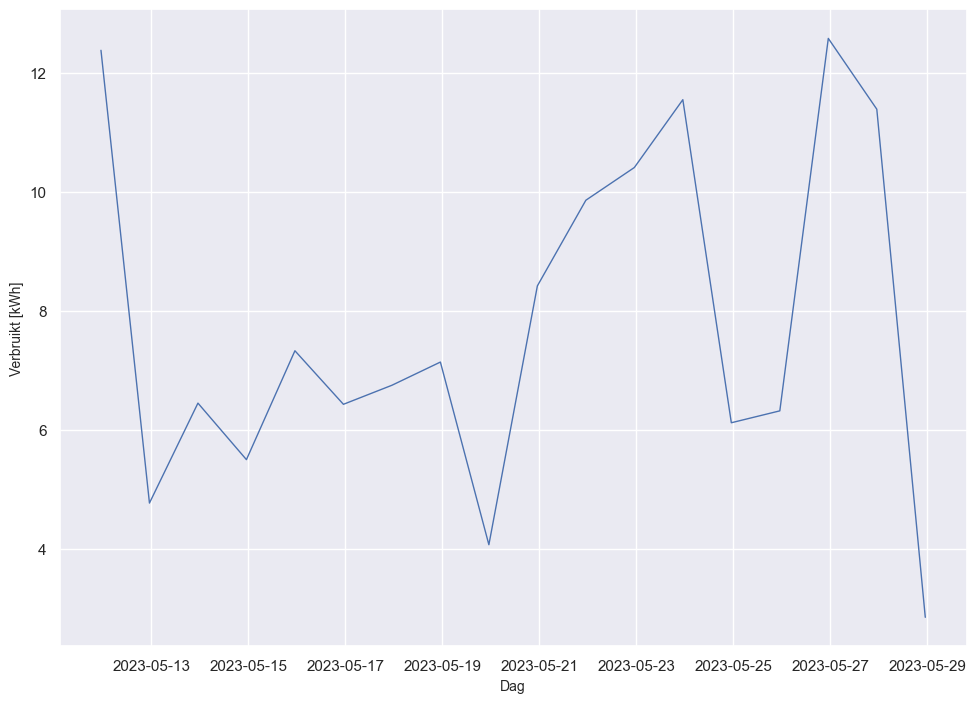

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
verbruik = sns.lineplot(data=use_power, palette="tab10", linewidth=1, markers=True, dashes=True)
verbruik.set_xlabel("Dag", fontsize = 10)
verbruik.set_ylabel("Verbruikt [kWh]", fontsize = 10)

In [13]:
# Verbruik
inverter_power = df.loc[start:end,'inverter_power']
inverter_power = pd.to_numeric(inverter_power, errors='coerce')

C:\Users\avanloon\AppData\Local\Temp\ipykernel_20052\2786463218.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  inverter = sns.lineplot(data=inverter_power, palette="tab10", linewidth=1, markers=True, dashes=True)


Text(0, 0.5, 'Inverter [kWh]')

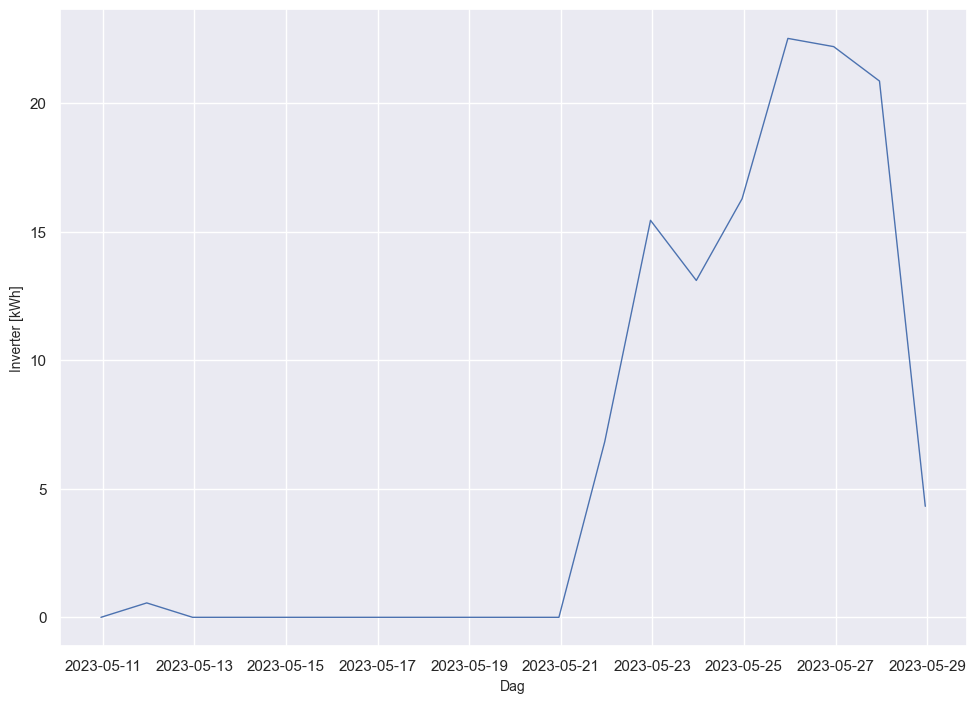

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
inverter = sns.lineplot(data=inverter_power, palette="tab10", linewidth=1, markers=True, dashes=True)
inverter.set_xlabel("Dag", fontsize = 10)
inverter.set_ylabel("Inverter [kWh]", fontsize = 10)

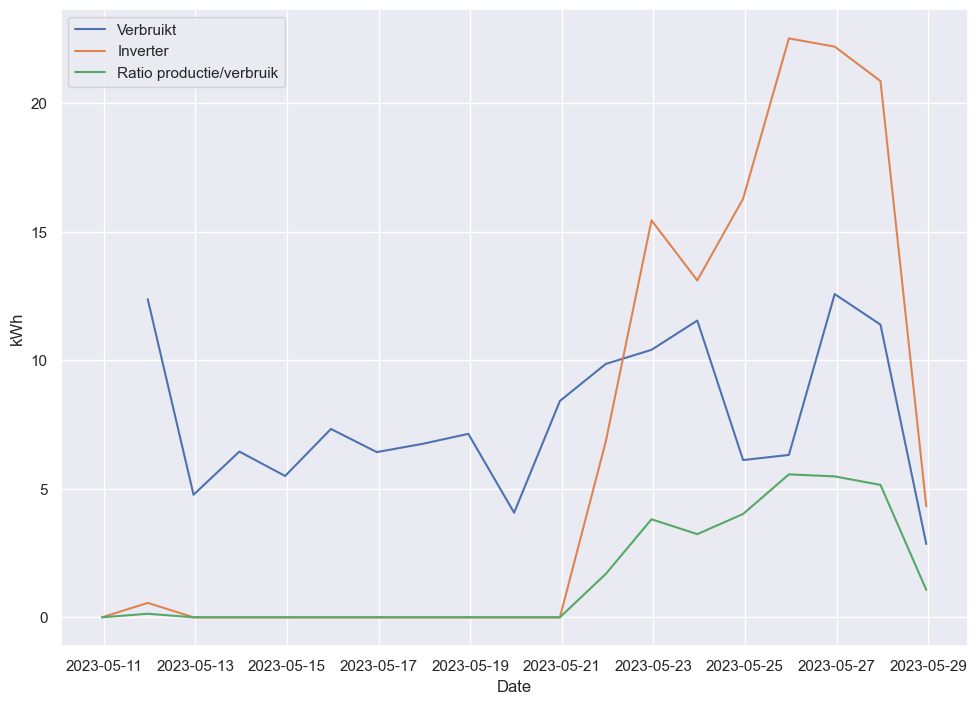

In [15]:
plt.plot(df.loc[start:end,'use_power'], label = "Verbruikt")
plt.plot(df.loc[start:end,'inverter_power'], label = "Inverter")
plt.plot(df.loc[start:end,'perpower_ratio'], label = "Ratio productie/verbruik")
plt.xlabel('Date')
plt.ylabel('kWh')
plt.legend()